In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# print(min, min_i, max, max_i)
# 8 36 521 121

## Working with Spike Times .npy File

In this section, we will learn how to load spike times recorded from neurons. Each neuron has a list of times when it fired a spike, saved as a NumPy array. We will see how to load this kind of data from files like .npy or .npz, and understand how it is organized.

Load spike times

In [33]:
spktimes = np.load('data/spike_times.npy', allow_pickle=True)

In [34]:
len(spktimes)

400

Number of events

In [35]:
len(spktimes[0])

376

In [36]:
len(spktimes[36])

8

In [37]:
len(spktimes[121])

521

Time of first and last event

In [38]:
spktimes[0].min()

0.6333333333333333

In [54]:
spktimes[121].max()

99.86666666666666

In [52]:
spktimes[36].min()

2.8333333333333335

Event plots

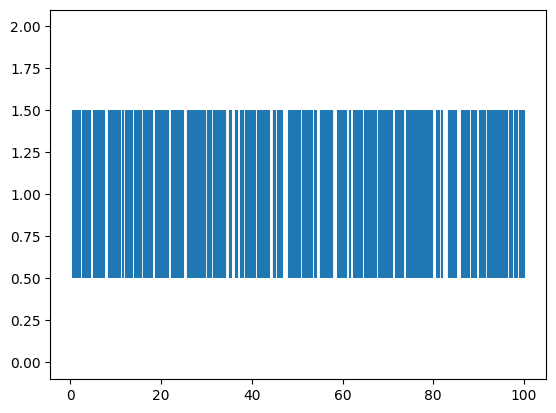

In [48]:
plt.eventplot(spktimes[0])

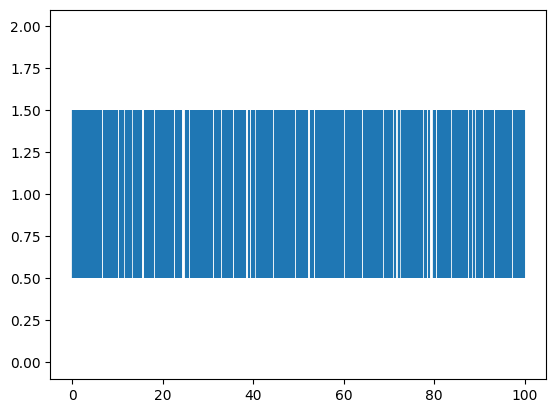

In [49]:
plt.eventplot(spktimes[121])

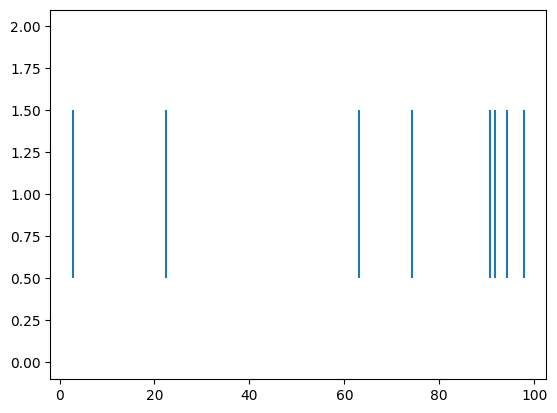

In [51]:
plt.eventplot(spktimes[36])

## Raster Plots

A raster plot is a simple way to see when neurons are firing. It shows one row for each neuron, and small lines for each spike.

In [96]:
spks = [spktimes[0], spktimes[1], spktimes[2]]

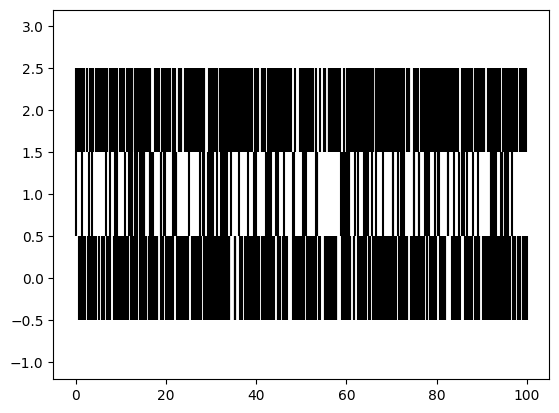

In [97]:
plt.eventplot(spks, colors='black')

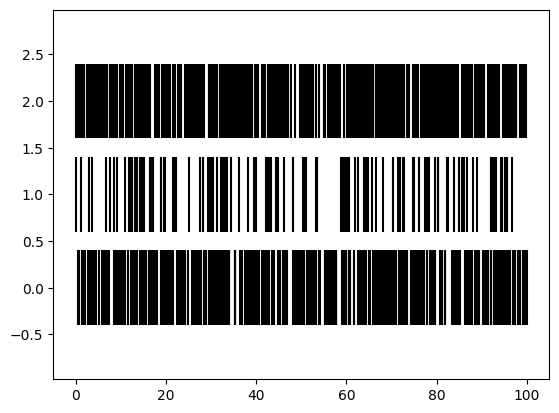

In [102]:
plt.eventplot(spks, colors='black', linelengths=0.8)

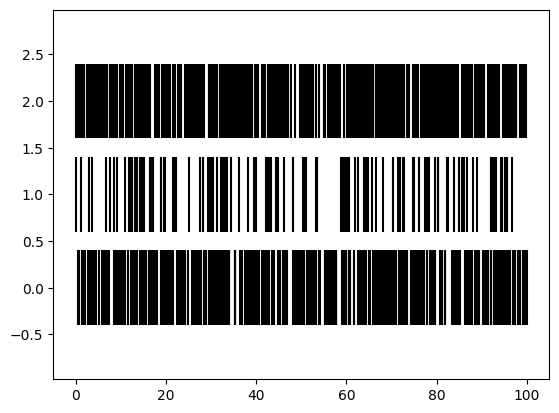

In [101]:
plt.eventplot(spks, colors='black', linelengths=0.8, lineoffsets=1)

In [103]:
spks = [spktimes[1], spktimes[36], spktimes[121]]

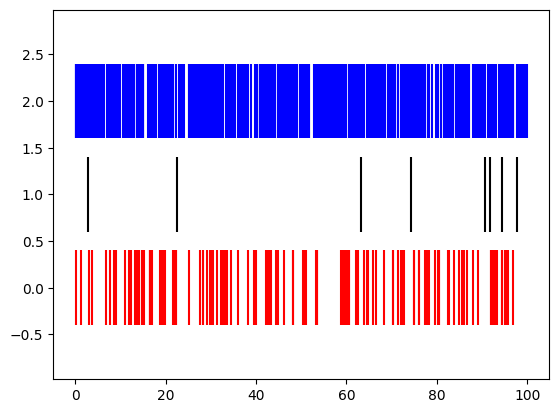

In [104]:
colors = ['red', 'black', 'blue']
plt.eventplot(spks, colors=colors, linelengths=0.8, lineoffsets=1)

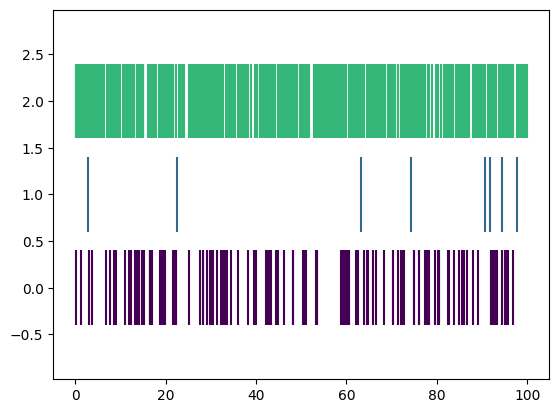

In [109]:
cmap = plt.get_cmap('viridis')  
colors = [cmap(i / len(spks)) for i in range(len(spks))]
plt.eventplot(spks, colors=colors, lineoffsets=1, linelengths=0.8);

In [111]:
spks = [spktimes[1], spktimes[2], spktimes[10], spktimes[36], spktimes[121]]

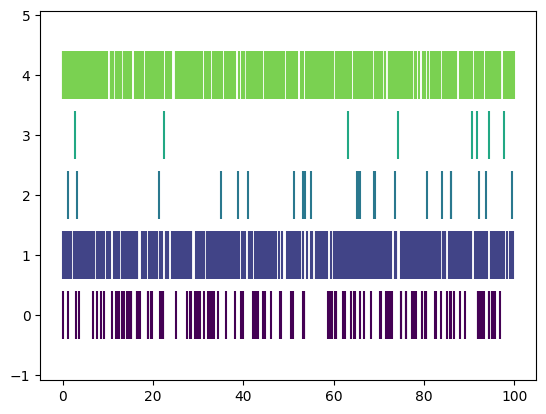

In [112]:
cmap = plt.get_cmap('viridis')  
colors = [cmap(i / len(spks)) for i in range(len(spks))]
plt.eventplot(spks, colors=colors, lineoffsets=1, linelengths=0.8);

In [110]:
spks = [spktimes[1], spktimes[2], spktimes[10], spktimes[36], spktimes[121]]

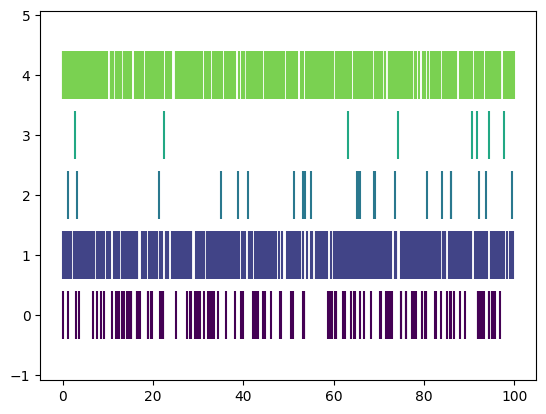

In [113]:
cmap = plt.get_cmap('viridis')  
colors = [cmap(i / len(spks)) for i in range(len(spks))]
plt.eventplot(spks, colors=colors, lineoffsets=1, linelengths=0.8);

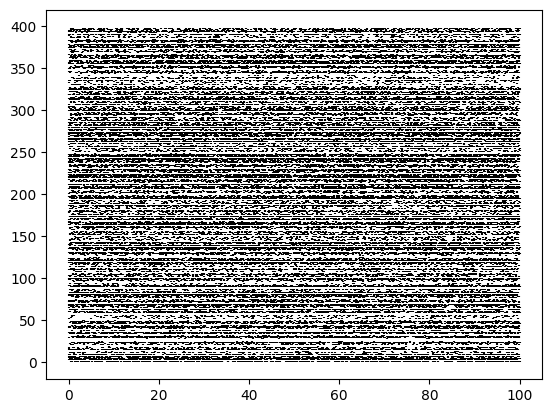

In [116]:
plt.eventplot(spktimes, colors='black', lineoffsets=1, linelengths=0.8);

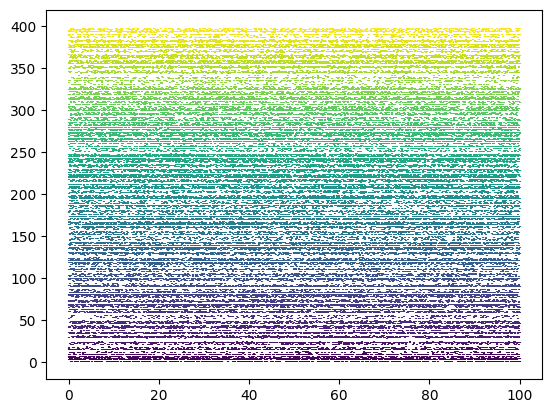

In [117]:
cmap = plt.get_cmap('viridis')  
colors = [cmap(i / 400) for i in range(400)]
plt.eventplot(spktimes, colors=colors, lineoffsets=1, linelengths=0.8);

## Firing Rate Estimation Over Time

Firing rate tells us how active a neuron is during a period of time. To calculate it, we count how many spikes happened in each time window. In this section, we will learn how to turn spike times into a firing rate signal over time. Let us see how to do this with three neurons.

In [66]:
recording_duration = 100. # second

**Average firing rate**

In [67]:
fr = len(spktimes[0]) / recording_duration
fr

3.76

In [68]:
fr = len(spktimes[36]) / recording_duration
fr

0.08

In [69]:
fr = len(spktimes[121]) / recording_duration
fr

5.21

**Time-varying firing rate**

- get bins from bin_width
- get spike counts from histogram
- estimate firing rate in each bin

*How many bins for specified bin width?*

In [77]:
bin_width = 10  
bins = np.arange(0, recording_duration + bin_width, bin_width)
len(bins)

11

In [78]:
bin_width = 0.1  
bins = np.arange(0, recording_duration + bin_width, bin_width)
len(bins)

1001

In [81]:
bin_width = 1.0  
bins = np.arange(0, recording_duration + bin_width, bin_width)
len(bins)

101

*How often did the neuron fire a certain number of spikes per second?*

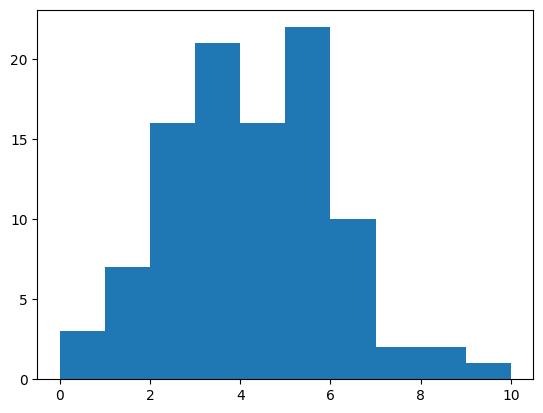

In [85]:
spike_counts1, _ = np.histogram(spktimes[0], bins=bins)
plt.hist(spike_counts1);

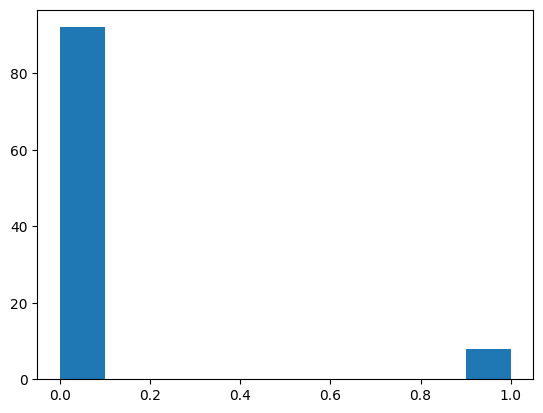

In [86]:
spike_counts2, _ = np.histogram(spktimes[36], bins=bins)
plt.hist(spike_counts2);

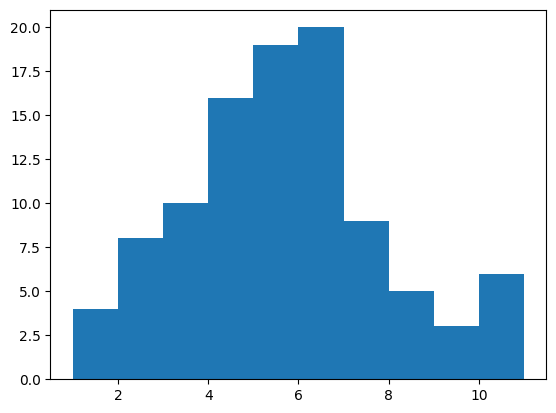

In [87]:
spike_counts3, _ = np.histogram(spktimes[121], bins=bins)
plt.hist(spike_counts3);

*What is the firing rate in each bin?*

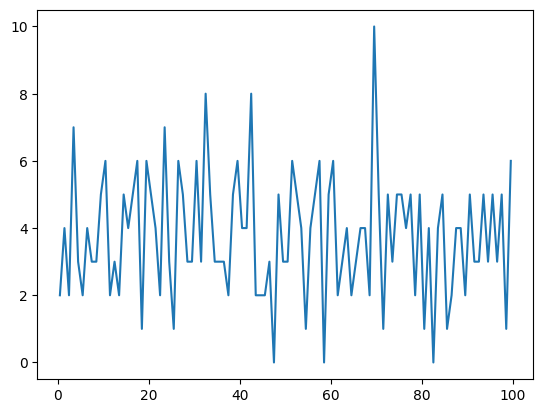

In [88]:
time_centers = bins[:-1] + bin_width / 2
firing_rate1 = spike_counts1 / bin_width
plt.plot(time_centers, firing_rate1)

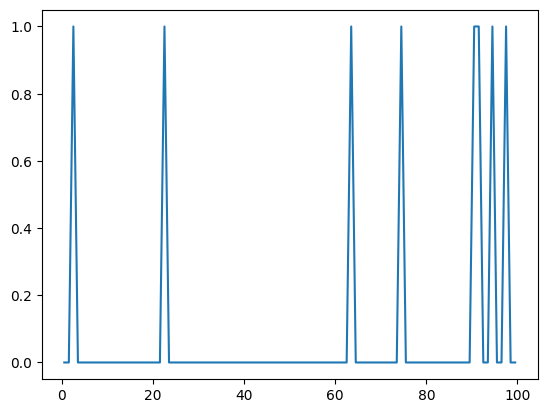

In [89]:
time_centers = bins[:-1] + bin_width / 2
firing_rate2 = spike_counts2 / bin_width
plt.plot(time_centers, firing_rate2)

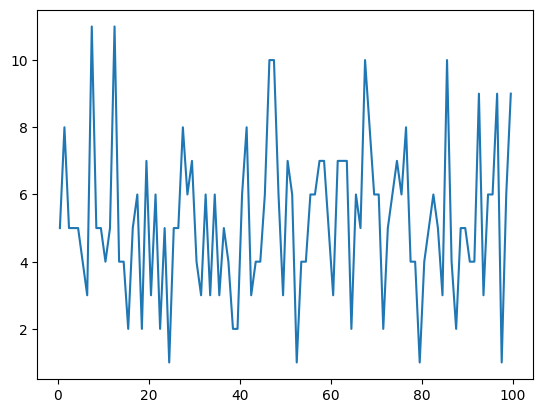

In [90]:
time_centers = bins[:-1] + bin_width / 2
firing_rate3 = spike_counts3 / bin_width
plt.plot(time_centers, firing_rate3)

## Comparing Spike Rates Across Neurons

Not all neurons fire at the same rate. Some are very active, while others spike only a few times. In this section, we will compute the average spike rate for each neuron over the whole recording. 

*Comparing number of events*

What was the least number of events?

In [122]:
num_events = np.array([len(spk) for spk in spktimes])

In [123]:
num_events.min()

8

What was the most number of events?

In [124]:
num_events.max()

521

What was the average number of events?

In [127]:
num_events.mean()

239.7175

Which neuron has least number of events?

In [128]:
num_events.argmin()

36

Which neuron has most number of events?

In [129]:
num_events.argmax()

121

*Comparing times*

When did the earliest event occur accross all neurons?

In [131]:
min_time = np.array([spk.min() for spk in spktimes])
min_time.min()

0.0

When did the latest event occur accross all neurons?

In [133]:
max_time = np.array([spk.max() for spk in spktimes])
max_time.max()

99.96666666666667

Which neuron fired the earliest?

In [134]:
min_time = np.array([spk.min() for spk in spktimes])
min_time.argmin()

17

Which neuron fired the latest?

In [135]:
max_time = np.array([spk.max() for spk in spktimes])
max_time.argmax()

0

*Firing rates*

In [136]:
recording_duration = 100. # second

What is the lowest average firing rate?

In [137]:
frs = np.array([len(spk) / recording_duration for spk in spktimes])
frs.min()

0.08

What is the highest average firing rate?

In [138]:
frs = np.array([len(spk) / recording_duration for spk in spktimes])
frs.max()

5.21

Which neuron has the lowest average firing rate?

In [139]:
frs = np.array([len(spk) / recording_duration for spk in spktimes])
frs.argmin()

36

Which neuron has the highest average firing rate?

In [140]:
frs = np.array([len(spk) / recording_duration for spk in spktimes])
frs.argmax()

121

**Demo** Raster plot of neurons sorted by firing rates

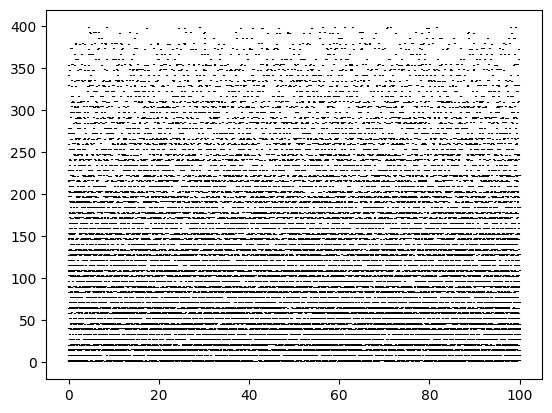

In [ ]:
firing_rates = [len(times) / recording_duration for times in spktimes]
sorted_indices = np.argsort(firing_rates)[::-1]
sorted_spike_times = [spktimes[i] for i in sorted_indices]
plt.eventplot(sorted_spike_times, colors='black', lineoffsets=1, linelengths=0.3);